[1.5315856650804873, 0.3676967337972644, 0.7353934675945286]


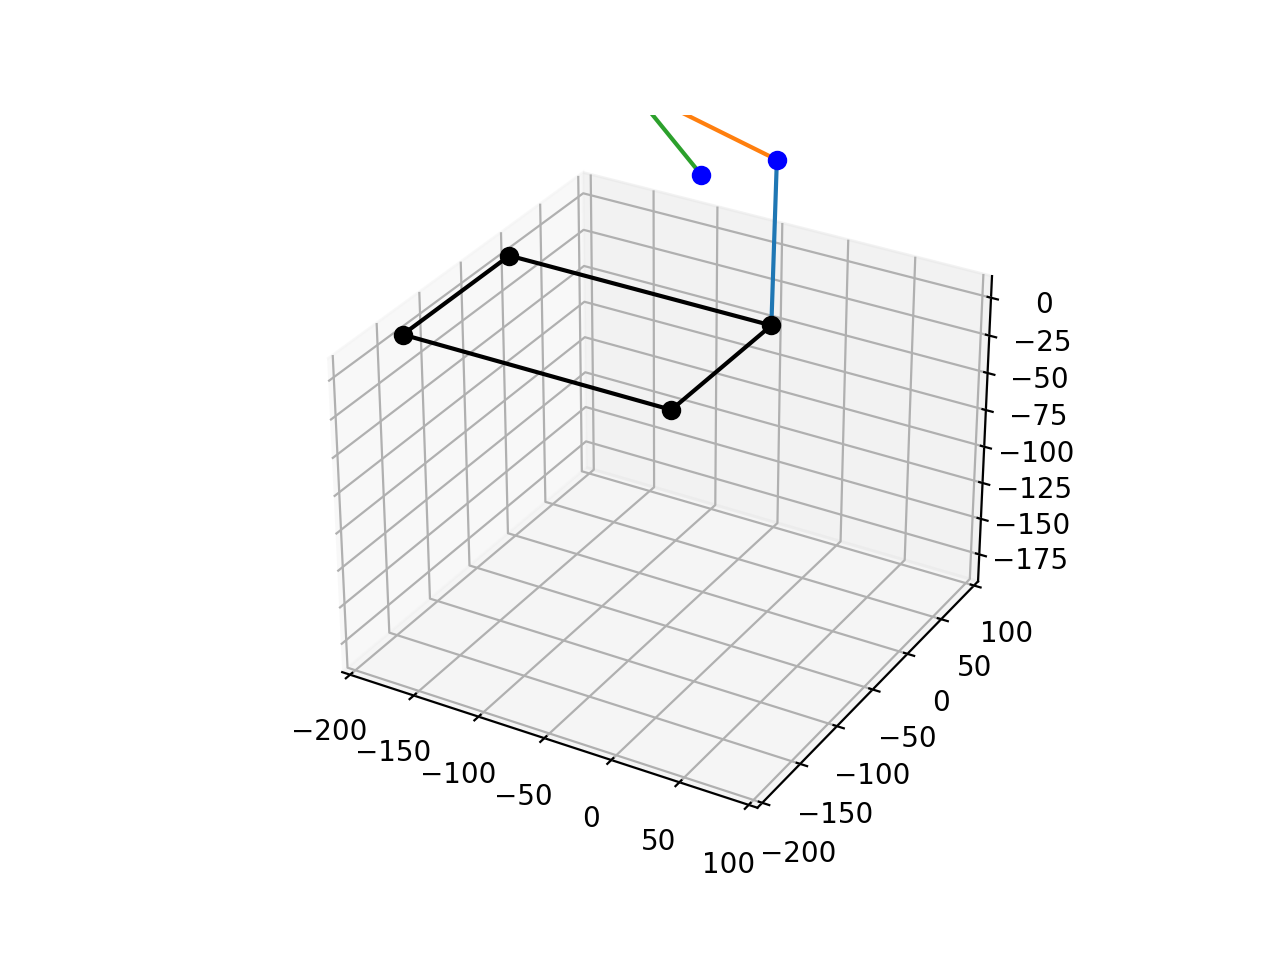

In [35]:
%matplotlib widget
import math
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

L1 = 104
L2 = 150
L3 = 150
J3_min = 30*np.pi/180
J3_max = 170*np.pi/180

class Point:
    def __init__(self):
        self.x:float
        self.y:float
        self.z:float


def plotLeg(angs:np.ndarray):
    l1_x = 0
    l1_y = float(f"{L1*np.cos(angs[0]):.4f}")
    l1_z = float(f"{L1*np.sin(angs[0]):.4f}")
    # ---
    l2_x = float(f"{-L2*np.cos(angs[1]):.4f}") + l1_x
    l2_y = float(f"{L2*np.sin(angs[1])*np.sin(angs[0]):.4f}") + l1_y
    l2_z = float(f"{-L2*np.sin(angs[1])*np.cos(angs[0]):.4f}") + l1_z
    # ---
    l3_x = float(f"{L3*np.cos(angs[2]):.4f}") + l2_x
    l3_y = float(f"{-L3*np.sin(angs[2])*np.sin(angs[0]):.4f}") + l2_y
    l3_z = float(f"{L3*np.sin(angs[2])*np.cos(angs[0]):.4f}") + l2_z
    # ---
    body_len_x = 200
    body_len_y = 130


    fig = plt.figure(dpi=200)
    ax = plt.axes(projection="3d")
    # leg FL
    ax.plot3D([0, l1_x], [0, l1_y], [0, l1_z])
    ax.plot3D([l1_x, l2_x], [l1_y, l2_y], [l1_z, l2_z])
    ax.plot3D([l2_x, l3_x], [l2_y, l3_y], [l2_z, l3_z])
    ax.plot(0,0,0, 'ko')
    ax.plot(l1_x,l1_y, l1_z, 'bo')
    ax.plot(l2_x,l2_y, l2_z, 'bo')
    ax.plot(l3_x,l3_y, l3_z, 'bo')
    # body
    ax.plot3D([0, -body_len_x], [0, 0], [0, 0], '-k')
    ax.plot(-body_len_x,0,0, 'ko')
    ax.plot3D([0, 0], [0, -body_len_y], [0, 0], '-k')
    ax.plot(0,-body_len_y,0, 'ko')
    ax.plot3D([-body_len_x, 0], [-body_len_y, -body_len_y], [0, 0], '-k')
    ax.plot(-body_len_x,-body_len_y,0, 'ko')
    ax.plot3D([-body_len_x, -body_len_x], [0, -body_len_y], [0, 0], '-k')
    # ---
    ax.set_xlim(-200, 100)
    ax.set_ylim(-200, 100)
    ax.set_zlim(-190, 10)

def ik_1(p:Point):
    c = np.sqrt(p.x**2 + p.y**2 - L1**2)
    D = (p.x**2 + p.y**2 + p.z**2 - L1**2 - L2**2 - L3**2)/(2*L2*L3)

    th1 = -np.arctan2(-p.y, p.x) - np.arctan2(c, -L1)
    th3_1 = np.arctan2(-np.sqrt(1 - D**2), D)
    th3_2 = np.arctan2(np.sqrt(1 - D**2), D)

    th3 = th3_1
    th2 = np.arctan2(p.z, c) - np.arctan2(L3*np.sin(th3), L2 + L3*np.cos(th3))
    return np.array([th1, th2, th3])



def ik_2(p:Point):
    print(p.x, p.y, p.z)
    r_yz = np.sqrt(p.y**2 + p.z**2)
    sin_th1_plus_alpha = L1/r_yz
    cos_th1_plus_alpha = np.sqrt(1 - sin_th1_plus_alpha**2)
    th1 = np.arctan2(sin_th1_plus_alpha, cos_th1_plus_alpha) - np.arctan2(-p.z, p.y)
    # ---
    cos_th3 = (p.x**2 + p.y**2 + p.z**2 - L1**2 - L2**2 - L3**3)/(2*L2*L3)
    print(cos_th3)
    sin_th3 = np.sqrt(1 - cos_th3**2)
    th3_1 = np.arctan2(sin_th3, cos_th3)
    th3_2 = np.arctan2(-sin_th3, cos_th3)
    th3 = th3_1 # select here th3 configuration
    # ---
    cos_th2 = -x/(L2+L3*np.cos(th3))
    sin_th2 = np.sqrt(1-cos_th2**2)
    th2 = np.arctan2(sin_th2, cos_th2)

    return [th1, th2, th3]

def ik_3(p:Point):
    r_yz = np.sqrt(p.y**2 + p.z**2)
    cos_alpha = p.y / r_yz
    sin_alpha = np.sqrt(1 - cos_alpha**2)
    alpha = np.arctan2(sin_alpha, cos_alpha)
    cos_alpha_minus_th1 = L1/r_yz
    sin_alpha_minus_th1 = np.sqrt(1 - cos_alpha_minus_th1**2)
    th1 = np.arctan2(sin_alpha_minus_th1, cos_alpha_minus_th1) - np.arctan2(p.z, p.y)
    # ---
    a = 2*L2*r_yz*np.sin(th1+ alpha)
    b = 2*L2*p.x
    c = p.x**2 + L2**2 - L3**2 + (a/(2*L2))**2
    d = np.sqrt(a**2 + b**2)
    cos_beta = a/d
    sin_beta = np.sqrt(1-cos_beta**2)
    beta = np.arctan2(sin_beta, cos_beta)
    th2 = beta + np.arctan2(c/d, np.sqrt(1-(c/d)**2))
    # ---
    cos_th3 = p.x + L2*np.cos(th2)/L3
    sin_th3 = np.sqrt(1-cos_th3**2)
    th3 = np.arctan2(sin_th3, cos_th3)
    

    return [th1, th2, th2+th3]
    

    



x = 0
y = 104
z = -100

p = Point()
p.x = x
p.y = y
p.z = z

angs = ik_3(p)
print(angs)

# angs = np.array([th0, th1, th1-th2])*np.pi/180
plotLeg(angs)



In [19]:
2.12**2

4.494400000000001